In [1]:
%matplotlib inline 
from matplotlib.pylab import plt
import numpy as np
import pandas as pd

Window functions are like aggregation functions. You can use them in conjunction with .resample() which will soon be a deferred operation

In [2]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600),
                  columns = ['A', 'B', 'C'])

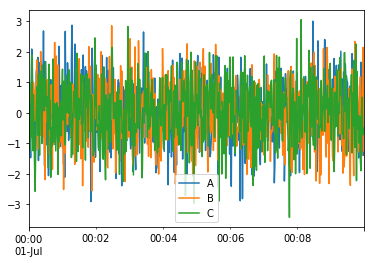

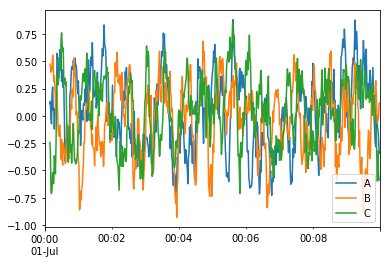

In [3]:
r = df.rolling(window = 10)
# r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile
# r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot()
r.mean().plot()
plt.show()

In [4]:
#exponentially weighted
df.ewm(span = 15, min_periods = 2).mean()[1:10]

,A,B,C
2016-07-01 00:00:01,0.056729,0.456808,0.183508
2016-07-01 00:00:02,-0.240225,0.520766,-0.352150
2016-07-01 00:00:03,-0.612879,0.485406,-0.408551
2016-07-01 00:00:04,-0.236410,0.548586,-0.506595
2016-07-01 00:00:05,0.292191,0.531722,0.038824
2016-07-01 00:00:06,0.572431,0.505120,-0.126384
2016-07-01 00:00:07,0.523525,0.293926,-0.339358
2016-07-01 00:00:08,0.237726,0.420805,-0.173247
2016-07-01 00:00:09,0.093115,0.480241,-0.246223


In [5]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000),
                  columns = ['A', 'B', 'C', 'D'])

In [6]:
df.head()

,A,B,C,D
2016-06-06,-0.525743,-0.899771,-1.265143,-0.239922
2016-06-07,-0.271033,0.256806,0.125966,-0.227340
2016-06-08,0.807746,0.646067,-0.709424,-0.901914
2016-06-09,1.584316,-0.146785,0.405610,-0.226517
2016-06-10,0.687807,-0.314064,-0.469873,-0.828841


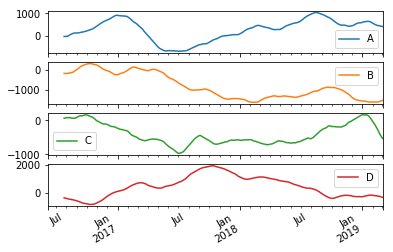

In [7]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)
plt.show()

In [8]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())[1:20]

,A,B,C,D
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,0.877160,0.537406,0.529708,1.133834
2016-06-16,0.916701,0.831407,0.705994,1.266296


In [9]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,-0.661259,-0.771367,-1.202159,-0.353592
2016-06-08,-0.437183,-0.513211,-1.417640,-0.692120
2016-06-09,0.070934,-0.420829,-1.423978,-0.918014
2016-06-10,0.513366,-0.428212,-1.521755,-1.219318


### Will an expanding window provide a more or less stable statistic than a rolling statistic?
An expanding window provides a more stable statistic than a rolling one because an expanding window remembers all data while a rolling one has a fixed window size.

### When might one vs. the other be appropriate?
A rolling statistic is appropriate when you want values to update quickly. An expanding window is more applicable for long term trends.

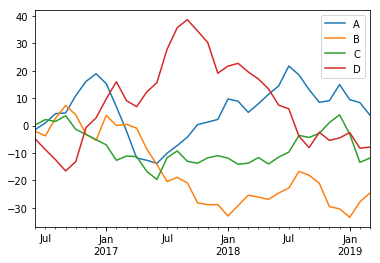

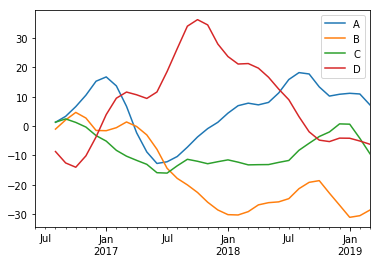

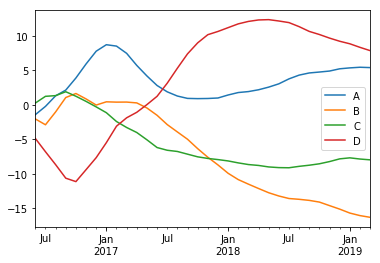

In [10]:
monthly = df.resample('MS').mean()
monthly.plot()
monthly.rolling(window=3).mean().plot()
monthly.expanding().mean().plot()
plt.show()

## EWMA
### Why use EWMA?
An exponentially weighted moving average applies weighting factors that decrease exponentially. This weights recent data higher than older data, while a simple rolling average weights all data points equally. This means an EWMA tracks data closer than a rolling average and will update faster after big changes.